<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Sep8-9/Conjunto_de_datos_con_Scikit_learn_y_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

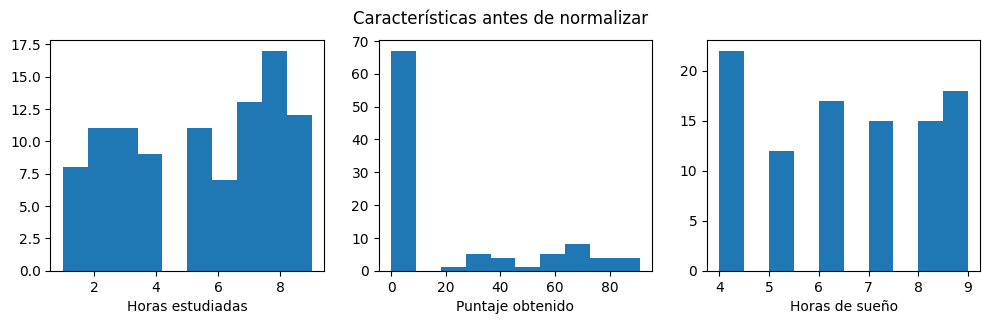

In [47]:
data=np.loadtxt("/content/Estudiantes.txt",delimiter=',')
Xh=data[:,:3]
th=data[:,3] #Costo

labels=["Horas estudiadas","Puntaje obtenido","Horas de sueño"]

scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh) #Normalizando Xh

fig,ax=plt.subplots(1, 3, figsize=(12, 3)) #Arreglo para generar los histogramas

for i in range(len(ax)):
    ax[i].hist(Xh[:,i]) #Grafico el histograma de cada característica
    ax[i].set_xlabel(labels[i])
fig.suptitle("Características antes de normalizar")
plt.show() #Muestro cada histograma

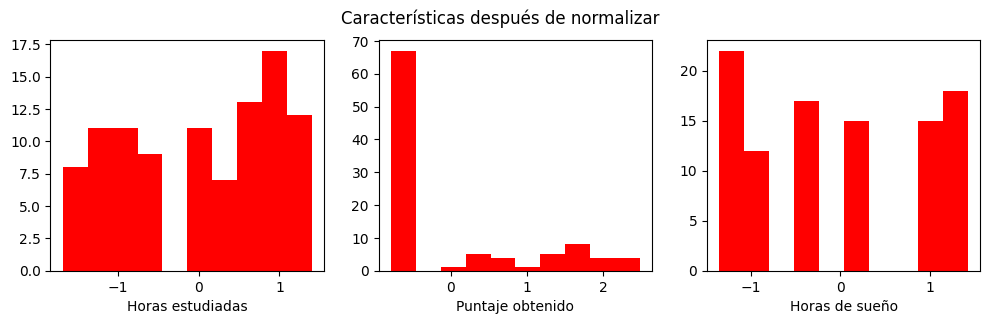

In [48]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3)) #Arreglo para generar los histogramas
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i],color="red") #Grafico el histograma de cada característica PERO NORMALIZADA "_norm"
    ax[i].set_xlabel(labels[i])
fig.suptitle("Características después de normalizar")
plt.show()

In [57]:
#Divido en conjunto de entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
Iteraciones: 14, Número de actualizaciones de los pesos: 967.0
Párametros del modelo  w0: [70.6546302], Pesos w:[0.48346955 4.94482381 0.32114614]


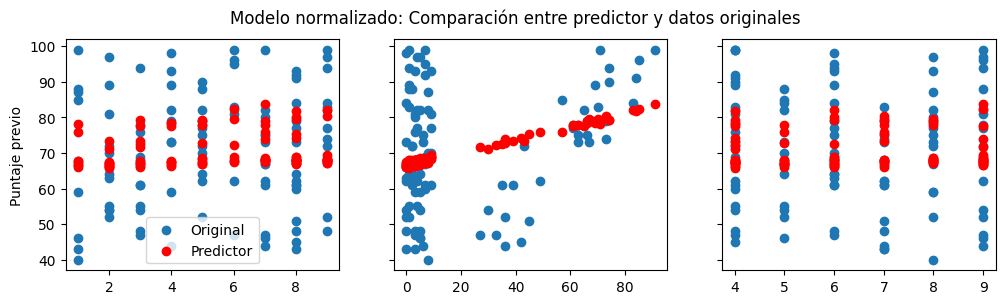

In [59]:
#Método de mínimos cuadrados con Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
#100 iteraciones, función de costo cuadrática, taza de aprendizaje constante, alpha=0.01 y sin penalización; método no regularizado.
sgdr.fit(X_train, y_train) #Le envio los datos de entrenamiento al conjunto
print(sgdr)
print(f"Iteraciones: {sgdr.n_iter_}, Número de actualizaciones de los pesos: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Párametros del modelo  w0: {w0_norm}, Pesos w:{w_norm}")

#¿Qué tanta relación hay entre el modelo generado por el conjunto de entrenamiento y el conjunto de validación
sgdr.score(X_test,y_test)

#Construyo el modelo del predictor usando los datos ya normalizados
yp = w0_norm[0] #Arreglo de los datos predecidos por el modelo
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i] #Polinomio con los coeficientes de Xh

#Gráficas de los datos vs predictor
fig,ax=plt.subplots(1,3,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'Original') #Grafico los datos originales
    ax[i].scatter(Xh[:,i],yp,color="red", label = 'Predictor') #Grafico los datos del predictor
ax[0].set_ylabel("Puntaje previo"); ax[0].legend();
fig.suptitle("Modelo normalizado: Comparación entre predictor y datos originales")
plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 228ms/step - loss: 5260.5356
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5061.5532
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 4870.6494
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 4687.4912
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 4511.7593
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 4343.1475
Epoch 7/100
1/1 [==============================] - 0s 10ms/s

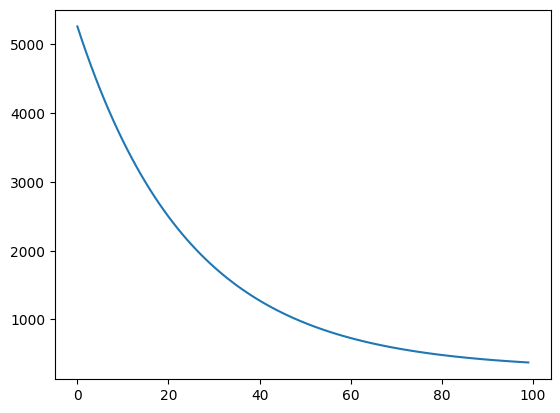

In [67]:
#Solución con Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2) #Semilla
model = Sequential()

input_dim = 3 #Tamaño de los datos de entrada
output_dim = 1 #Tamaño de los datos de salida
model.add(Dense(output_dim, input_dim=input_dim, activation='linear')) #Modelo lineal
sgd = SGD(learning_rate=0.01) #Gradiente descendiente estocástico
model.compile(loss='mse', optimizer=sgd)
#mse significa mean squared root; valor promedio al cuadrado entre la diferencia del valor predecido y el real ¿varianza?
model.summary()

num_epochs = 100
batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size) #Ajusto el modelo
#Epochs es el número de epocas, que es el numero de veces que se va a actualizar el conjunto de datos
#Batch_size es el número de datos con los que va a trabajar el método

capas = model.layers[0] #Red neuronal de una capa
w, b = capas.get_weights() #Pesos w y w0
print(w,b)

history_df = pd.DataFrame(history.history) #Conjunto de datos de entrenamiento
history_df['loss'].plot(); #Graficando con Pandas la perdida

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 368.9049
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 365.2821
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 361.7967
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 358.4434
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 355.2172
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 352.1129
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 349.1262
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 346.2522
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 343.4868
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 340.8257
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 338.2650
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 335.8008
Epoch 13/100
1/1 [==================

204.63787841796875

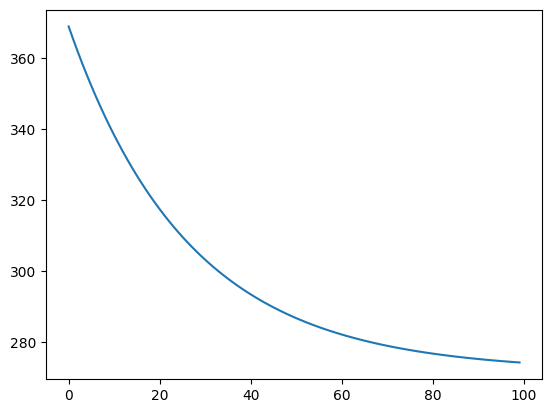

In [66]:
#Continuación de Keras: Ajustando el modelo nuevamente
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size) #Vuelvo a ajustar el modelo

capas = model.layers[0] #Red neuronal de una capa
w, b = capas.get_weights() #Pesos w y w0
print(w,b)

#Conjunto de datos de entrenamiento
history_df = pd.DataFrame(history2.history)
#Graficando con pandas la perdida
history_df['loss'].plot();

#Relación entre el modelo pronosticado y el conjunto de entrenamiento
score = model.evaluate(X_test, y_test, verbose=0)
score

Con keras se obtienen los pesos:
w0=69.33102, w1=-0.29763934, w2=4.3189874 y w3=0.11556444.

Con Scikit-learn se obtienen los pesos:
w0=70.6546302, w1=0.48346955,w2= 4.94482381 y w3=0.32114614

En general w0 es el coeficiente más cercano, mientras que w1, w2 y w3 sí presentan una variación relativamente significativa:

*   w0 en scikit-learn presenta un diferencia de alrededor de -1 respecto de keras. -Relativamente bajo-
*   w1 en scikit-learn presenta un diferencia de alrededor de -0.6 respecto de keras. -Relativamente alto-
*   w2 en scikit-learn presenta un diferencia de alrededor de -0.6 respecto de keras. -Relativamente bajo-
*   w3 en scikit-learn presenta un diferencia de alrededor de -0.21 respecto de keras. -relativamente alto-

En general se observa que los pesos en Keras son menores.

Otra cosa que me gustaría destacar aquí es que en los gráficos de w1 y w3 -Horas estudiadas y horas de sueño- si vemos las gráficas hechas con scikit-learn parece no haber mucha relación entre el predictor y el original, considero que este puede ser la razón por la que los pesos varian tanto, ya que en si el modelo lineal no se ajusta como un modelo predictor en estos casos, analógamente en w1 la diferencia es relativamente baja y en la gráfica sí se ve un comportamiento lineal del modelo predictor.